

---

 **#STEP 1:
Read and statistic data**








*#Kết nối tới file data ở github*

In [28]:
import pandas as pd
import numpy as np
!git clone 'https://github.com/Phuc-ph-2109/doands102.git'

fatal: destination path 'doands102' already exists and is not an empty directory.


*#Đọc dữ liệu và thống kê*



Counter({'neutral': 555, 'positive': 555, 'negative': 530})


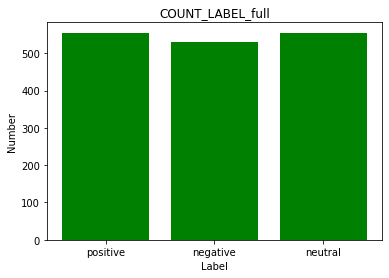

In [29]:
import matplotlib.pyplot as plt
from collections import Counter
df = pd.read_csv("/content/doands102/vnexpress.csv")
print(Counter(np.array(df['label'])))
label = ["positive", "negative", "neutral"]
count_label = [555, 530, 555]
plt.bar(label, count_label, color = "green")
plt.title("COUNT_LABEL_full")
plt.xlabel("Label")
plt.ylabel("Number")
plt.show()

*#Chia tập train test, và Visualize nhãn*

Counter({'positive': 443, 'neutral': 440, 'negative': 429})


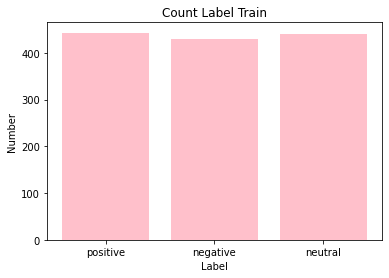

Counter({'neutral': 115, 'positive': 112, 'negative': 101})


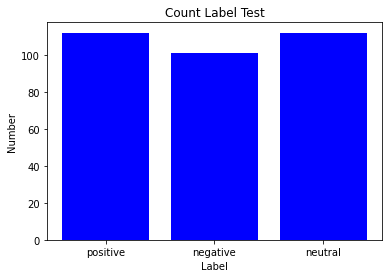

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0].values
Y = df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size =0.8, random_state = 0, shuffle = True)
print(Counter(np.array(Y_train)))

count_label_train = [443, 429, 440]
count_label_test = [112, 101, 112]
plt.bar(label, count_label_train, color = "pink")
plt.title("Count Label Train")
plt.xlabel("Label")
plt.ylabel("Number")
plt.show()

print(Counter(np.array(Y_test)))
plt.bar(label, count_label_test, color = "blue")
plt.title("Count Label Test")
plt.xlabel("Label")
plt.ylabel("Number")
plt.show()

**#STEP 2: Preprocessing data**

*# Xóa kí tự đặc biệt, tách từ theo ngôn ngữ Việt*

In [31]:
# cài đặt thư viện pyvi
!pip install pyvi

In [32]:
from pyvi import ViTokenizer, ViPosTagger
import string
import itertools
def process_text(text):
    
    #1 Xóa kí tự đặc biệt, chuyển về chữ thường
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    nopunc = ''.join(ch for ch, _ in itertools.groupby(nopunc))
    #2 Vitokennizer, chuyển về chữ thường
    review = ViTokenizer.tokenize(nopunc)
    return review

*#Chuyển nhãn thành số*

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train_n = encoder.fit_transform(Y_train)
Y_test_n = encoder.fit_transform(Y_test)

print(Y_train_n)

[1 2 1 ... 1 0 2]


*#Tạo bags of Word, sử dụng TfidfTransformer để giảm những từ xuất hiện nhiều nhưng vô nghĩa*
*Sử dụng pipeline kết hợp*

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Model 1 xử dụng MultinomialNB của Naive Bayes
model1 = Pipeline([('vect', CountVectorizer(analyzer=process_text)),('tfidf', TfidfTransformer()),('clf1', MultinomialNB()),])

# Model 2 xử dụng Suport Vector Machine
model2 = Pipeline([('vect', CountVectorizer(analyzer=process_text)),('tfidf', TfidfTransformer()),('clf2', SVC()),])


**#STEP 3: Training model & Save model**

In [35]:
import pickle
# Model 1
model1.fit(X_train,Y_train)
filename = 'NaiveBayes_model.sav'
pickle.dump(model1, open(filename, 'wb'))
# Model 2
model2.fit(X_train,Y_train)
filename = 'SVM_model.sav'
pickle.dump(model2, open(filename, 'wb'))

**#STEP 4: Confusion Matrix**

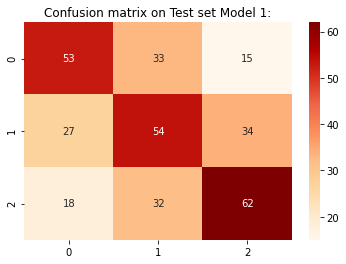

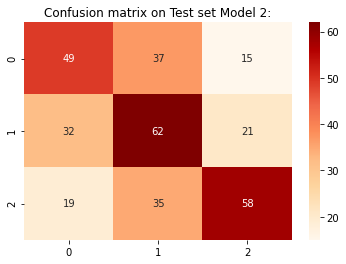

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Test set model 1
cm = confusion_matrix(Y_test, model1.predict(X_test))
plt.title('Confusion matrix on Test set Model 1:')
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'OrRd', annot_kws = {"size": 10})
plt.savefig('confusionmatrix_test_Logistic.png')
plt.show()

#Test set model 2
cm = confusion_matrix(Y_test, model2.predict(X_test))
plt.title('Confusion matrix on Test set Model 2:')
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'OrRd', annot_kws = {"size": 10})
plt.savefig('confusionmatrix_test_SVM.png')
plt.show()

**#STEP 5: Review the model**

In [37]:
from sklearn.metrics import classification_report
#Model 1
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.54      0.52      0.53       101
     neutral       0.45      0.47      0.46       115
    positive       0.56      0.55      0.56       112

    accuracy                           0.52       328
   macro avg       0.52      0.52      0.52       328
weighted avg       0.52      0.52      0.52       328



In [38]:
#Model 2
print(classification_report(Y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.49      0.49      0.49       101
     neutral       0.46      0.54      0.50       115
    positive       0.62      0.52      0.56       112

    accuracy                           0.52       328
   macro avg       0.52      0.51      0.52       328
weighted avg       0.52      0.52      0.52       328



In [39]:
#Compare model 1
df_compare = pd.DataFrame()
df_compare['cmt'] = X_test
df_compare['label'] = Y_test
df_compare['Predict label'] = model1.predict(X_test)
print('Compare on 20 line in test set:')
print(df_compare.head(20))

df_compare.to_excel('predict_NaiveBayes.xlsx')

Compare on 20 line in test set:
                                                  cmt     label Predict label
0   Thất vọng quá. Tưởng thiết kế vuông vức mạnh m...  negative      negative
1   Nhìn con s20 là đủ biết ss quay lại con đường ...  negative      negative
2   đi xe vinfast,điện thoại B phone,ăn cơm việt,n...  positive      positive
3   Em Huawei P40 Pro ngon và chất quá. Mình sẽ xú...  positive      positive
4                     Vẫn còn cái tai thỏ khuyết tật.  negative      negative
5                   Quá bình thường, nhìn như đồ chơi  negative      negative
6   Mấy con điện thoại giá bình dân dùng đã ok phế...  positive      negative
7   Sao không giữ thiết kế bo viền nam tính như SE...  negative      negative
8   Như vậy giống như bản nâng cấp cấu hình của IP...   neutral      positive
9                               Giá này thì chết nữa.  negative       neutral
10  Điện thoại này quá xuất sắc, tôi cũng vừa mua ...  positive      negative
11  Iphone 6s plus tôi mua từ nh

In [40]:
#Compare model 2
df_compare = pd.DataFrame()
df_compare['cmt'] = X_test
df_compare['label'] = Y_test
df_compare['Predict label'] = model2.predict(X_test)
print('Compare on 20 line in test set:')
print(df_compare.head(20))

df_compare.to_excel('predict_SVM.xlsx')

Compare on 20 line in test set:
                                                  cmt     label Predict label
0   Thất vọng quá. Tưởng thiết kế vuông vức mạnh m...  negative      negative
1   Nhìn con s20 là đủ biết ss quay lại con đường ...  negative      negative
2   đi xe vinfast,điện thoại B phone,ăn cơm việt,n...  positive      positive
3   Em Huawei P40 Pro ngon và chất quá. Mình sẽ xú...  positive      positive
4                     Vẫn còn cái tai thỏ khuyết tật.  negative      negative
5                   Quá bình thường, nhìn như đồ chơi  negative      negative
6   Mấy con điện thoại giá bình dân dùng đã ok phế...  positive      negative
7   Sao không giữ thiết kế bo viền nam tính như SE...  negative      negative
8   Như vậy giống như bản nâng cấp cấu hình của IP...   neutral       neutral
9                               Giá này thì chết nữa.  negative       neutral
10  Điện thoại này quá xuất sắc, tôi cũng vừa mua ...  positive      negative
11  Iphone 6s plus tôi mua từ nh